## Initialisation

### Dependencies

#### Third party

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

#### Personal notebook

An index file already exists for Additive Manufactured SS 316L. Do you want to re-initalise? (Y/n): y
An index file already exists for AA 2195 T8. Do you want to re-initalise? (Y/n): y
An index file already exists for AA 2195 Solutionized. Do you want to re-initalise? (Y/n): y
An index file already exists for AA 2195 T6. Do you want to re-initalise? (Y/n): y
An output file already exists for Additive Manufactured SS 316L. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 T8. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 Solutionized. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 T6. Do you want to re-initalise? (Y/n): y


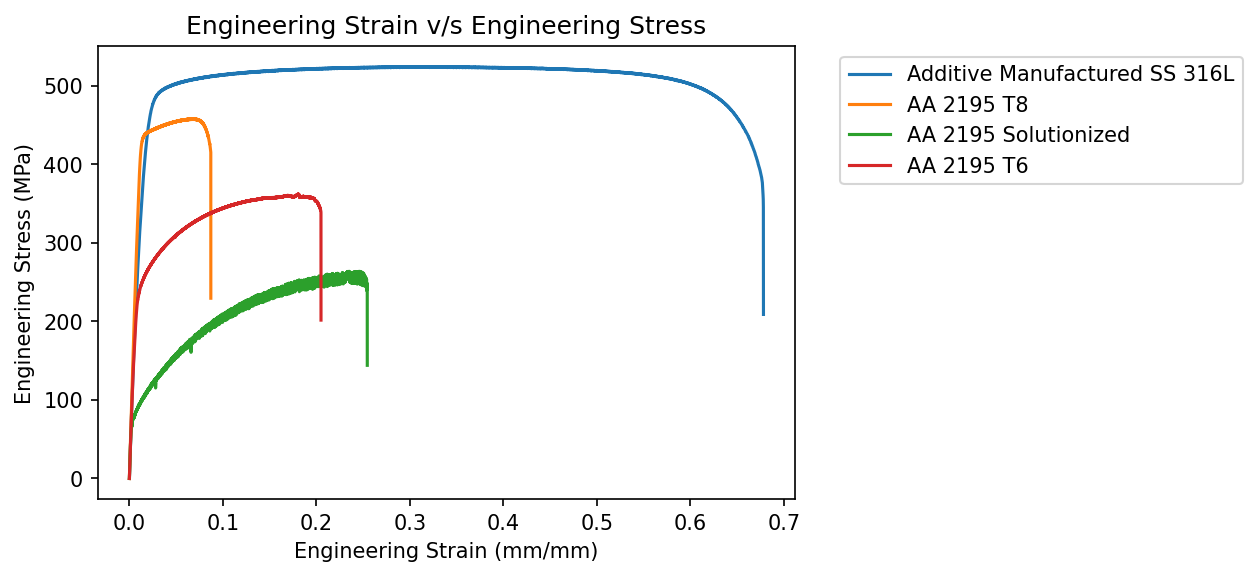

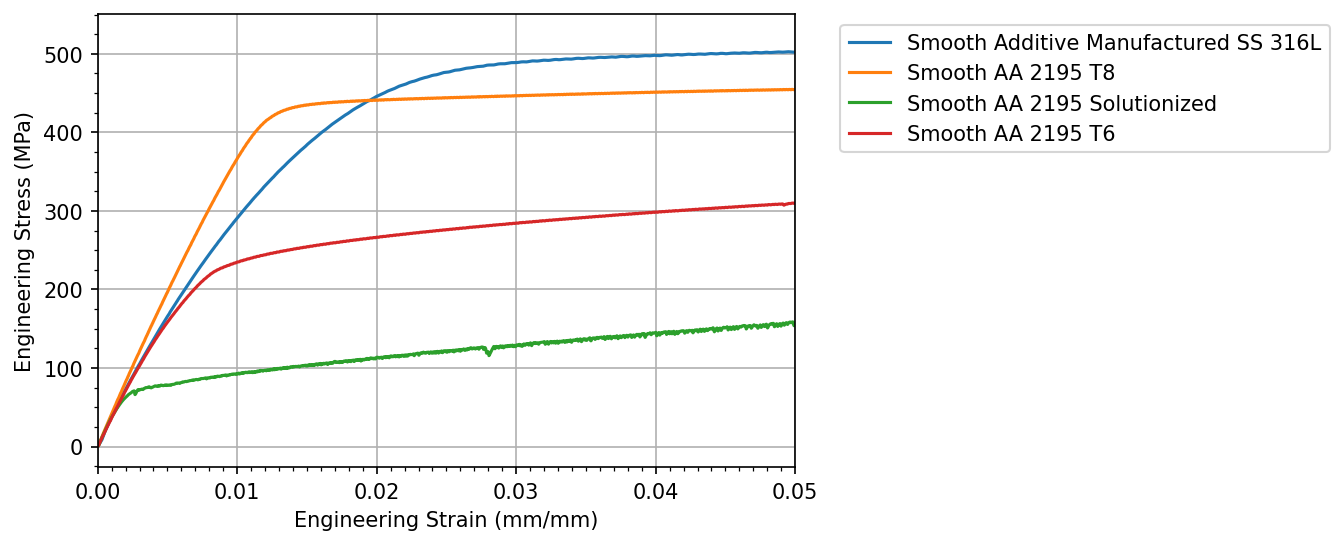

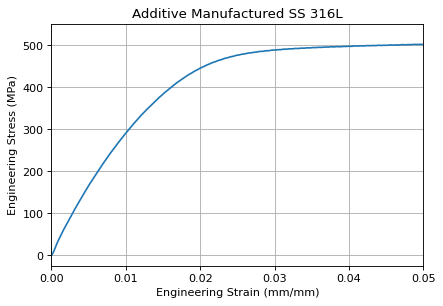

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in Additive Manufactured SS 316L's dataset: 0.015
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 400
Young's Modulus: 24.528471752330667 GPa


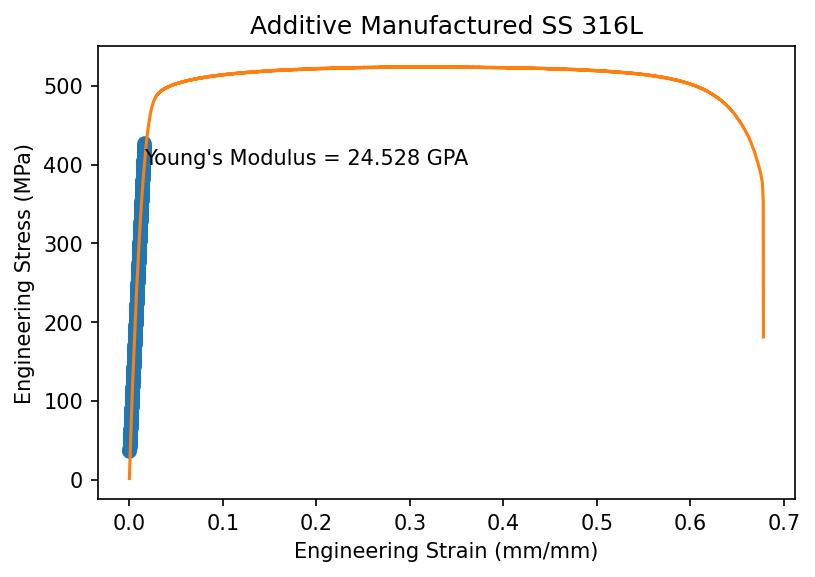

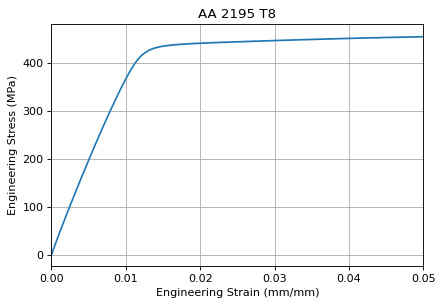

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 T8's dataset: 0.012
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 405
Young's Modulus: 35.723025091550156 GPa


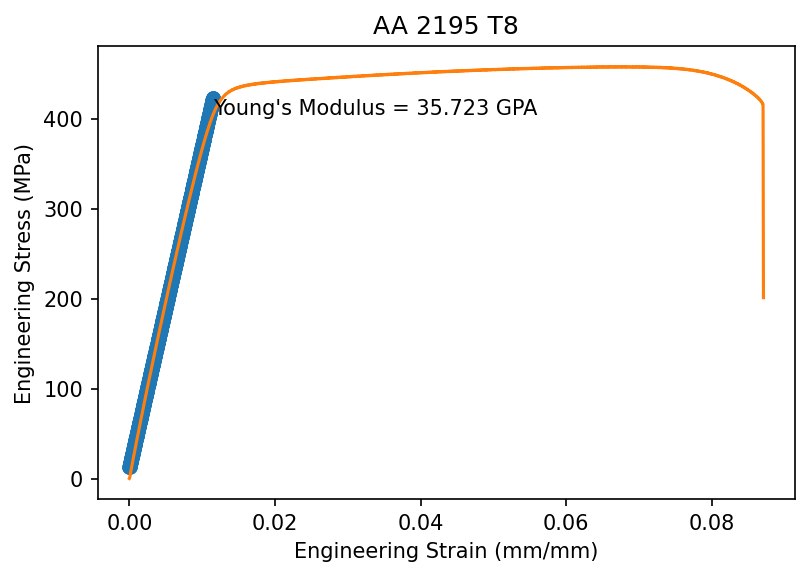

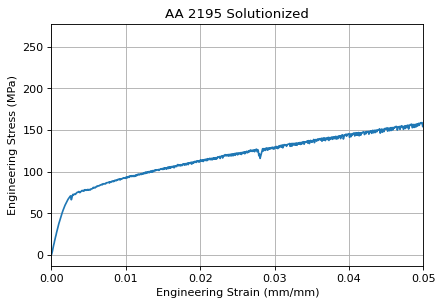

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 Solutionized's dataset: 0.003
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 68
Young's Modulus: 29.617332749346176 GPa


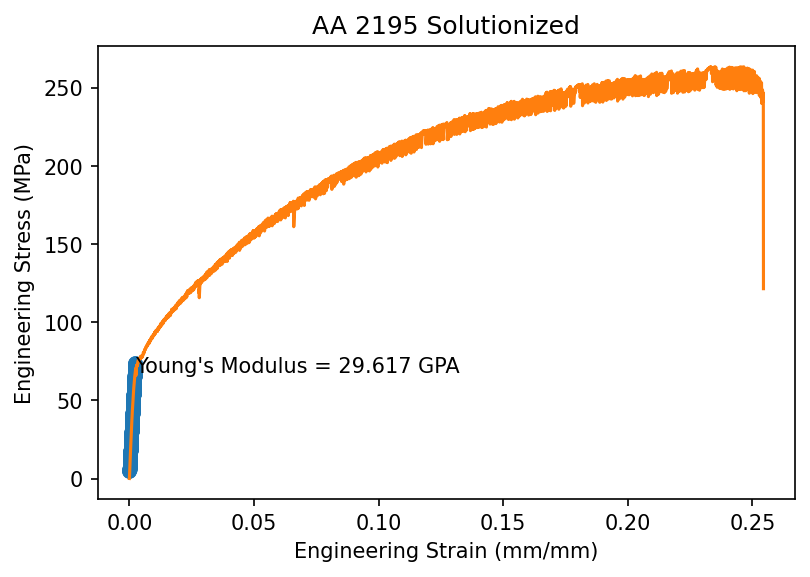

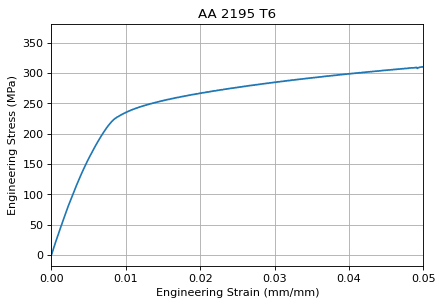

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 T6's dataset: 0.008
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 222
Young's Modulus: 26.992714051872607 GPa


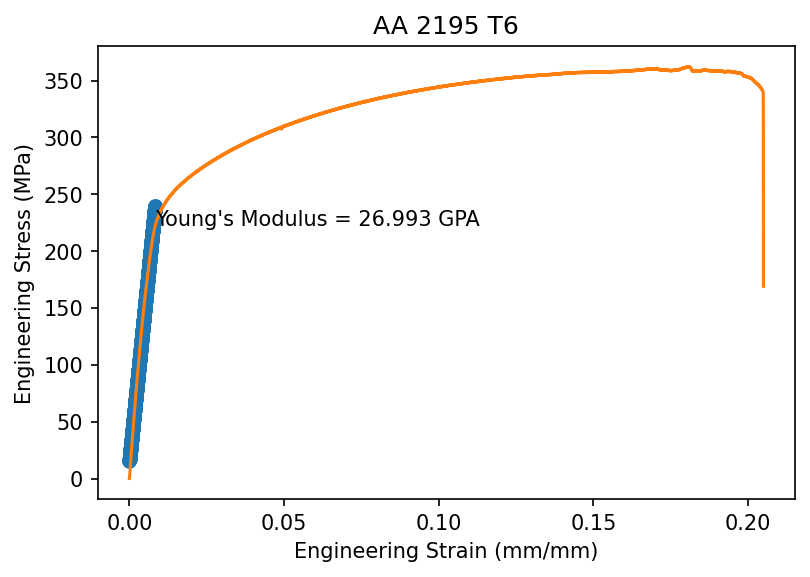

Yield Strength: 447.88676 MPa


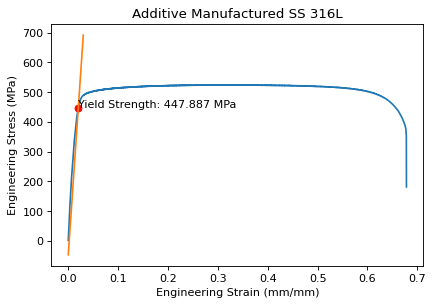

Yield Strength: 431.60026000000005 MPa


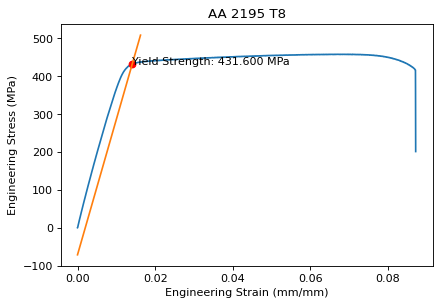

Yield Strength: 78.038544 MPa


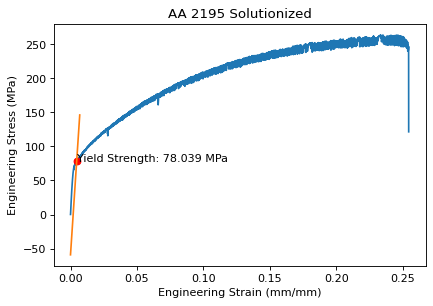

Yield Strength: 238.88962400000003 MPa


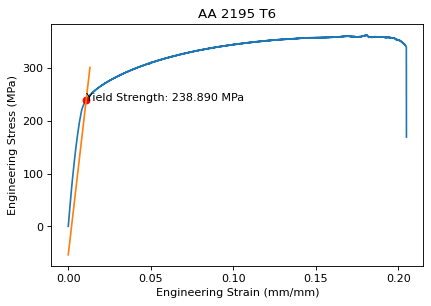

Ultimate Tensile Strength is 524.425548 MPa at 31.816329999999997% elongation.
Ultimate Tensile Strength is 457.9231510000001 MPa at 6.798% elongation.
Ultimate Tensile Strength is 263.639546 MPa at 23.327% elongation.
Ultimate Tensile Strength is 362.20079200000004 MPa at 18.095% elongation.


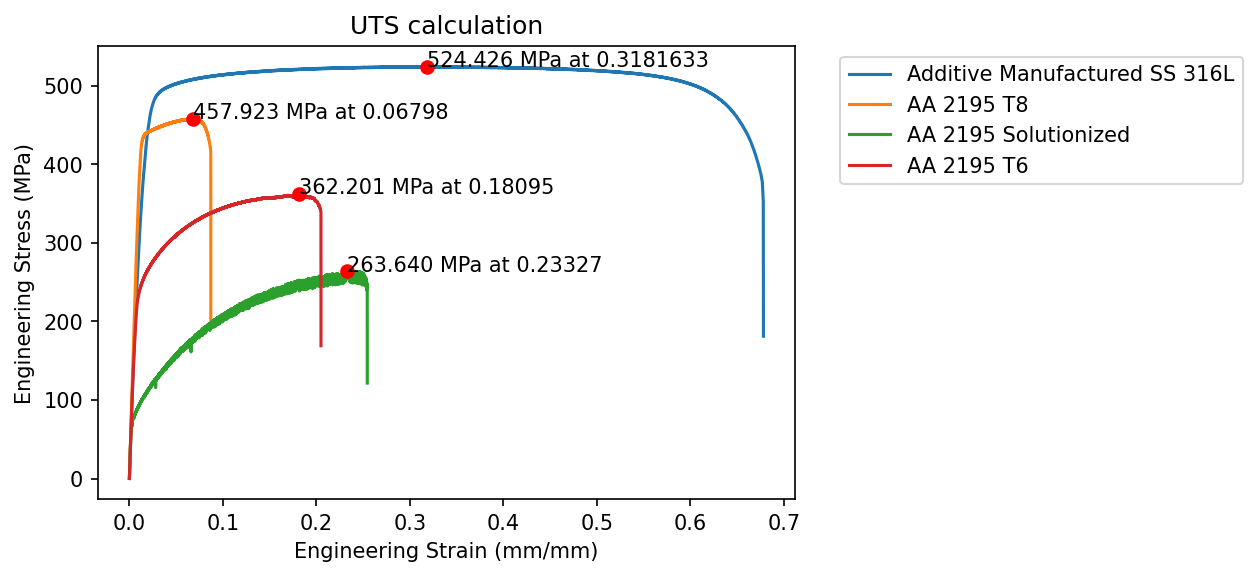

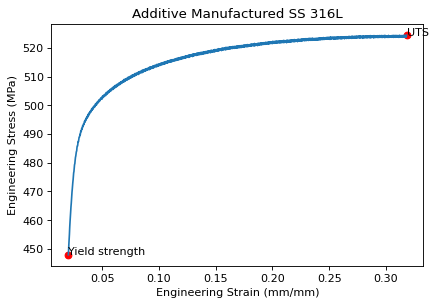

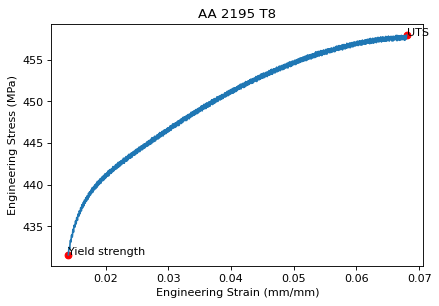

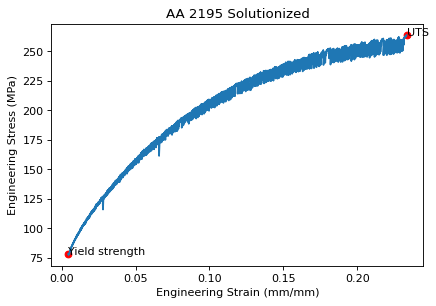

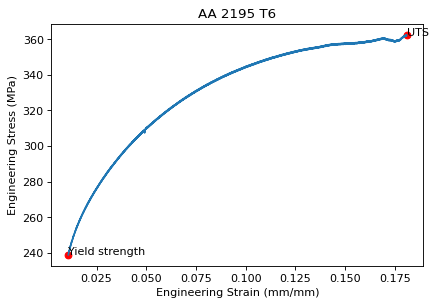

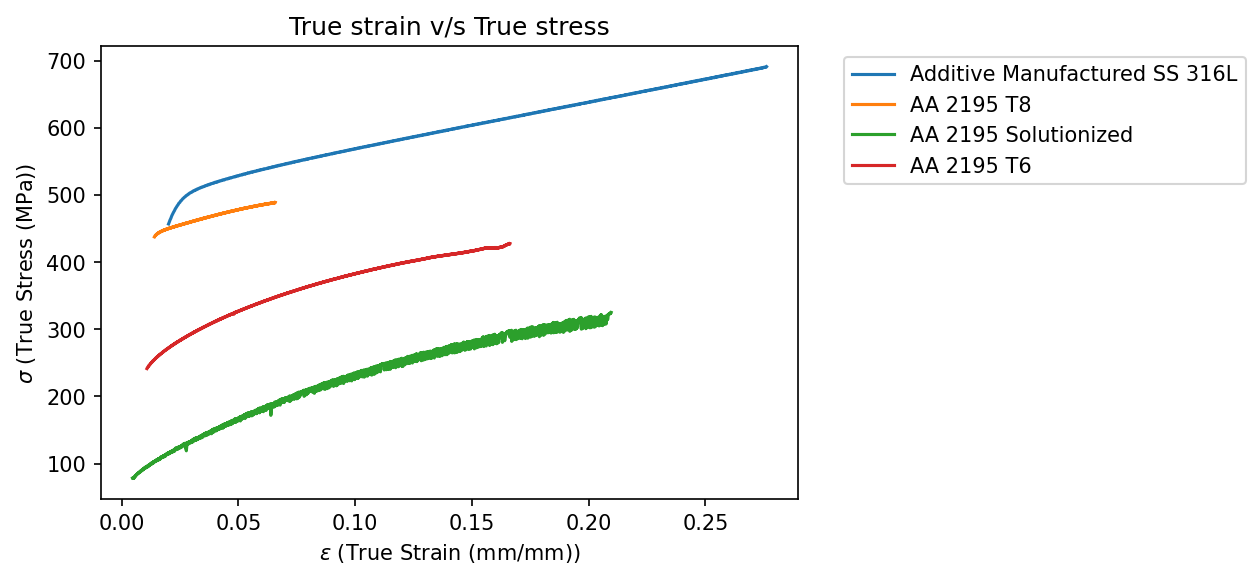

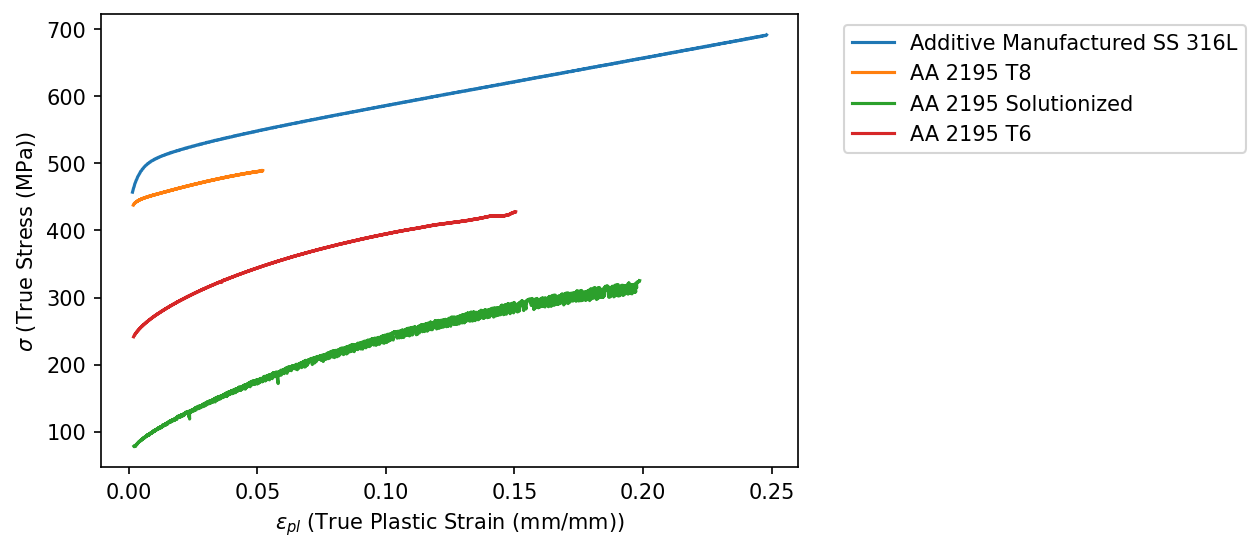

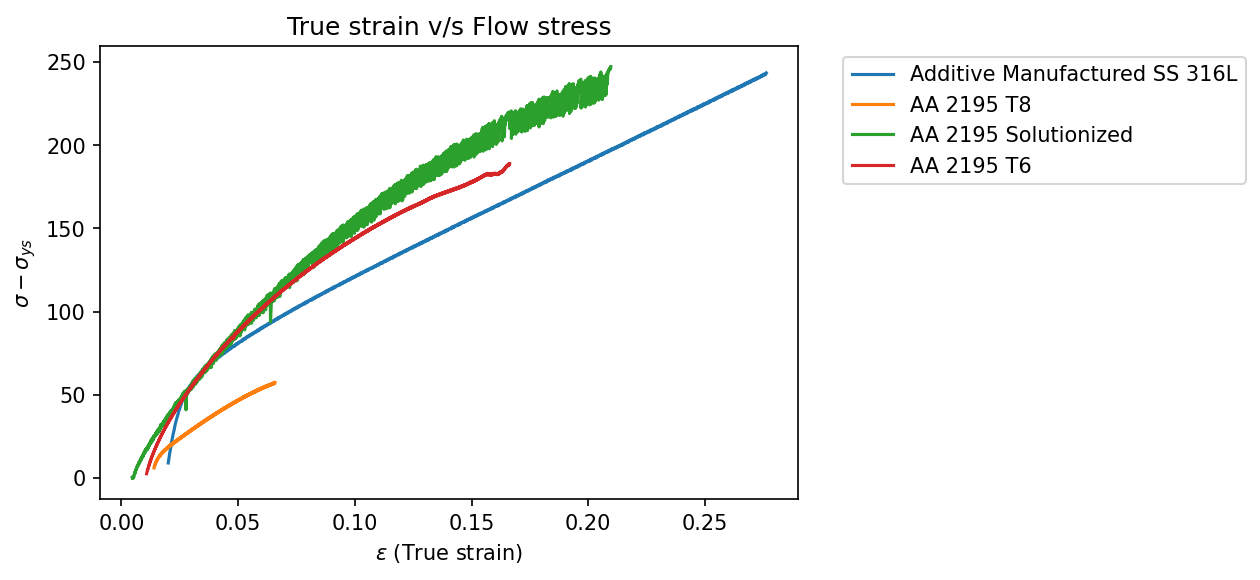

In [2]:
import ipynb

from ipynb.fs.full.dataset_initialisation import (
    ifile,
    ofile,
    OUTPUT_DIR,
    PROJECT_NAME,
    COMBINED_OUTPUT_DIR,
)
from ipynb.fs.defs.utilities import (
    differentiate,
    dash,
)

true_strain = []
true_stress = []
for i in range(len(OUTPUT_DIR)):
    if (os.path.exists(f'{OUTPUT_DIR[i]}/true_strain_vs_true_stress.csv')):
        df = pd.read_csv(f'{OUTPUT_DIR[i]}/true_strain_vs_true_stress.csv', sep=',', names=['x','y'])
        true_strain.append(df['x'].to_numpy())
        true_stress.append(df['y'].to_numpy())
else:
    from ipynb.fs.full.true_strain_stress import (
        true_stress,
        true_strain,
    )

true_plastic_strain = []
for i in range(len(OUTPUT_DIR)):
    if (os.path.exists(f'{OUTPUT_DIR[i]}/true_plastic_strain_vs_true_stress.csv')):
        df = pd.read_csv(f'{OUTPUT_DIR[i]}/true_plastic_strain_vs_true_stress.csv', sep=',', names=['x','y'])
        true_plastic_strain.append(df['x'].to_numpy())
else:
    from ipynb.fs.full.true_strain_stress import (
        true_plastic_strain,
    )

yield_strength = [i.get_parameter('yield_strength') for i in ifile]
if None in yield_strength:
    from ipynb.fs.full.engineering_strain_stress import (
        yield_strength,
    )

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \: or \: \frac{d\sigma}{d\epsilon} \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Fitting hollomon equation to true stress-true strain data

### Computing work hardening exponent

There are two ways to compute it:
1. Fitting hollomon equation to experimental data
2. Taking $ log $ on both sides of the hollomon equation

### Hollomon Equation

$ \sigma = K \cdot \epsilon^n $

#### Method 1

Do you want to provide initial guess for K and n? (Y/n): 


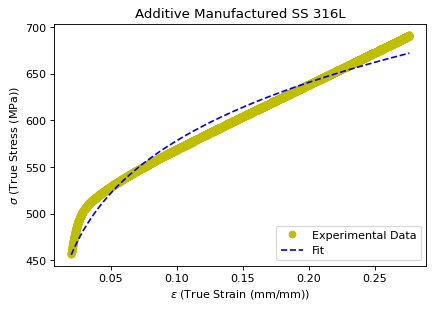

Strength coefficient (K): 812.9173957895197
Work hardening exponent (n): 0.14790494434214166
Do you want to provide initial guess for K and n? (Y/n): 


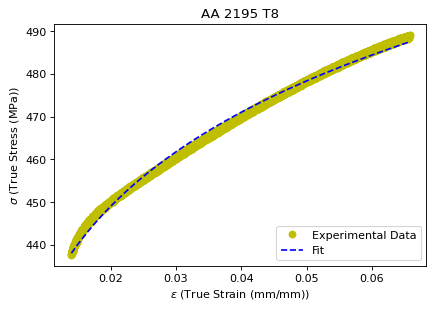

Strength coefficient (K): 588.2613294326882
Work hardening exponent (n): 0.06904678615166904
Do you want to provide initial guess for K and n? (Y/n): 


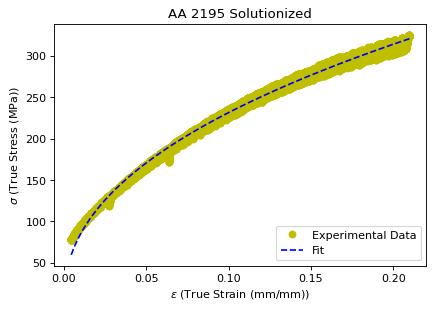

Strength coefficient (K): 638.7108738504828
Work hardening exponent (n): 0.44067368601526863
Do you want to provide initial guess for K and n? (Y/n): 


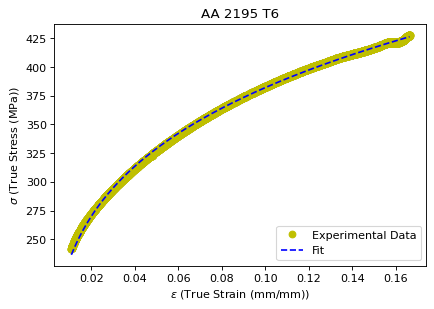

Strength coefficient (K): 627.3956613439643
Work hardening exponent (n): 0.21532168953726355


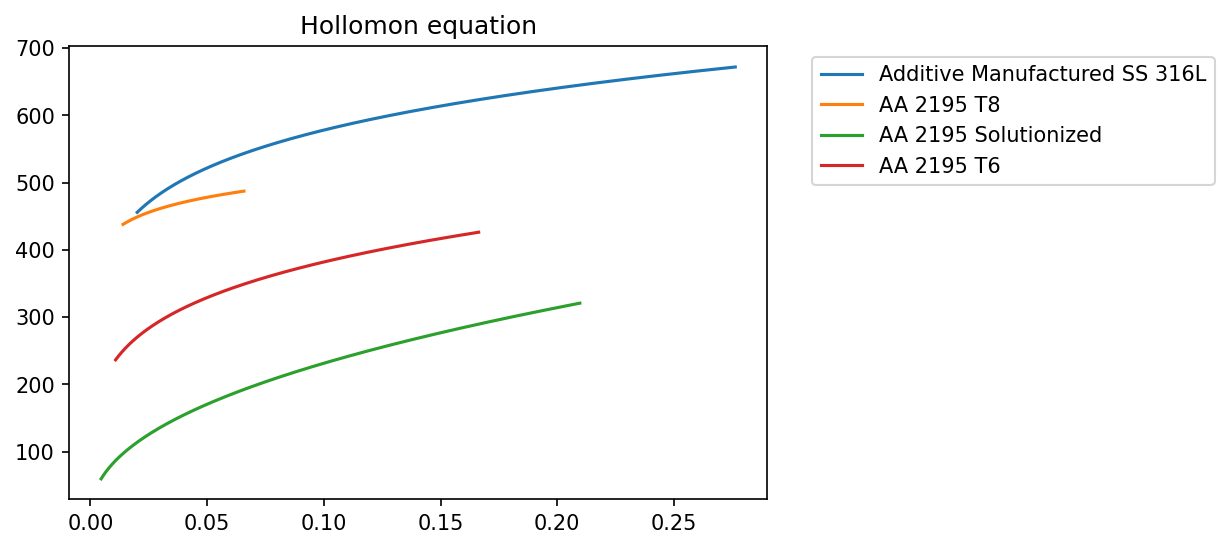

In [3]:
def fit_hollomon(x, K, n):
        return K*(x**n)

hollomon_K = []
hollomon_n = []

for i in range(len(true_strain)):

    choose = input('Do you want to provide initial guess for K and n? (Y/n): ')

    p0=None

    if choose in ['Y', 'y']:
        initial_guess_n = float(input("Intial guess of work hardening exponent (0 < n < 1): "))
        initial_guess_K = float(input("Intial guess of strength coefficient (MPa): "))
        p0 = (initial_guess_K, initial_guess_n)


    rhs_theoretical_hollomon = curve_fit(
        fit_hollomon, true_strain[i], true_stress[i], p0, method='lm',
    )
    popt, _ = rhs_theoretical_hollomon
    hollomon_K.append(popt[0])
    hollomon_n.append(popt[1])

    fig, ax = plt.subplots(1,1)
    ax.plot(true_strain[i], true_stress[i], 'yo')
    ax.plot(true_strain[i], [fit_hollomon(pl,hollomon_K[i],hollomon_n[i]) for pl in true_strain[i]], 'b--')
    ax.set_xlabel('$\epsilon$ (True Strain (mm/mm))')
    ax.set_ylabel('$\sigma$ (True Stress (MPa))')

    if choose in ['Y', 'y']:
        _ = ax.plot(true_strain[i], [fit_hollomon(pl,initial_guess_K,initial_guess_n) for pl in true_strain[i]], 'g:',)
        _ = ax.legend(['Experimental Data','Guess', 'Fit'], loc='lower right')

    _ = ax.legend(['Experimental Data','Fit'], loc='lower right')
    ax.set_title(PROJECT_NAME[i])

    fig.set_dpi(80)
    fig.savefig(f'{OUTPUT_DIR[i]}/Hollomon curve', facecolor='white', transparent=True, dpi=150)
    
    plt.show()

    print(f'Strength coefficient (K): {hollomon_K[i]}')
    print(f'Work hardening exponent (n): {hollomon_n[i]}')

    if ifile[i].add_parameter('K_M1', hollomon_K[i]):
        ofile[i].save_parameter('Strength coefficient (K) (M1)', hollomon_K[i], 'MPa')

    if ifile[i].add_parameter('n_M1', hollomon_n[i]):
        ofile[i].save_parameter('Work hardening exponent (n) (M1)', hollomon_n[i], '')

fig2, ax2 = plt.subplots(1,1)

for i in range(len(true_strain)):
    ax2.plot(true_strain[i], [fit_hollomon(pl,hollomon_K[i],hollomon_n[i]) for pl in true_strain[i]])

ax2.set_title('Hollomon equation')
ax2.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
fig2.set_dpi(150)
fig2.savefig(
    f'{COMBINED_OUTPUT_DIR}/Hollomon equation',
    bbox_inches='tight',
    facecolor='white',
    transparent=True,
)

#### Method 2

$ \sigma = K \cdot \epsilon^n \Rightarrow $ 
$ log(\sigma) = logK + nlog\epsilon $

In [4]:
log_true_stress = [np.log(i) for i in true_stress]
log_true_strain = [np.log(i) for i in true_strain]

for i in range(len(log_true_strain)):
    model = LinearRegression().fit(log_true_strain[i].reshape(-1,1), log_true_stress[i])
    coef = model.score(log_true_strain[i].reshape(-1,1), log_true_stress[i])
    work_hard_exp = model.coef_[0]
    strenght_coefficient = np.exp(model.intercept_)
    
    print(dash(PROJECT_NAME[i]))
    print(f'Work hardening exponent: {work_hard_exp}')
    print(f'Strength coefficient: {strenght_coefficient}')
    print(f'Accuracy in calculations: {coef}')

    if ifile[i].add_parameter('K_M2', strenght_coefficient):
        ofile[i].save_parameter('Strength coefficient (K) (M2)', strenght_coefficient, 'MPa')

    if ifile[i].add_parameter('n_M2', work_hard_exp):
        ofile[i].save_parameter('Work hardening exponent (n) (M2)', work_hard_exp, '')

----------Additive Manufactured SS 316L-----------
Work hardening exponent: 0.143190836599958
Strength coefficient: 805.2633212321133
Accuracy in calculations: 0.9690278885173806
--------------------AA 2195 T8--------------------
Work hardening exponent: 0.0687686858921045
Strength coefficient: 587.7225325851637
Accuracy in calculations: 0.9935701600730142
---------------AA 2195 Solutionized---------------
Work hardening exponent: 0.42328880393636426
Strength coefficient: 614.0278908910603
Accuracy in calculations: 0.9917038666647899
--------------------AA 2195 T6--------------------
Work hardening exponent: 0.21374912734994334
Strength coefficient: 624.9334298984231
Accuracy in calculations: 0.9987049990047466


## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\epsilon$

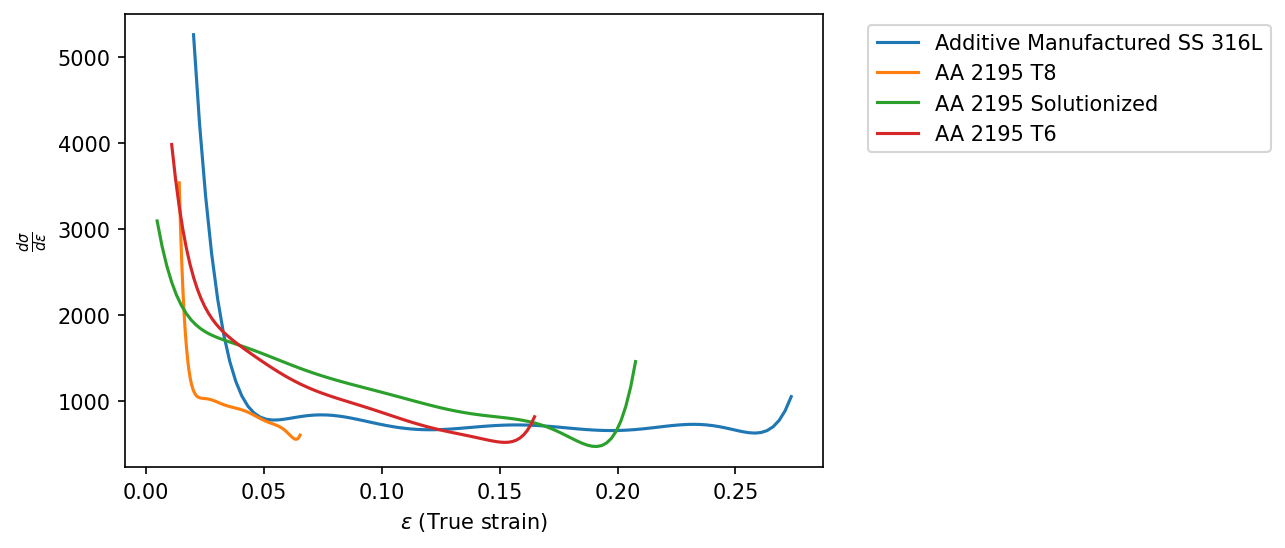

In [5]:
fig, ax = plt.subplots(1,1)

reduced_true_strain = []
reduced_true_stress = []
d_sigma_epsilon = []

for i in range(len(true_strain)):
    true_stress_smooth_coeff = np.polyfit(true_strain[i], true_stress[i], 9)

    consider = 101

    reduced_true_strain.append(np.linspace(min(true_strain[i]),max(true_strain[i]),consider))
    reduced_true_stress.append(np.polyval(true_stress_smooth_coeff, reduced_true_strain[i]))

    d_sigma_epsilon.append(differentiate(reduced_true_strain[i], reduced_true_stress[i]))

    ax.plot(reduced_true_strain[i][:consider-1], d_sigma_epsilon[i])
    ax.set_xlabel('$\epsilon$ (True strain)')
    ax.set_ylabel('$\\frac{d\sigma}{d\epsilon}$')

    fig.set_dpi(150)
    fig.savefig(
        f'{OUTPUT_DIR[i]}/Work hardening rate vs true strain',
        facecolor='white',
        bbox_inches='tight',
        transparent=False,
    )

    pd.DataFrame(
        np.transpose(np.asarray([reduced_true_strain[i][:consider-1], d_sigma_epsilon[i]], dtype=object))
    ).to_csv(f'{OUTPUT_DIR[i]}/true_strain_vs_work_hardening_rate.csv', index=False, header=False)

_ = ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))

Roger Lumley, *Fundamentals of Aluminium Metallurgy: Production, Processing and Applications*, 2011, Page No 311

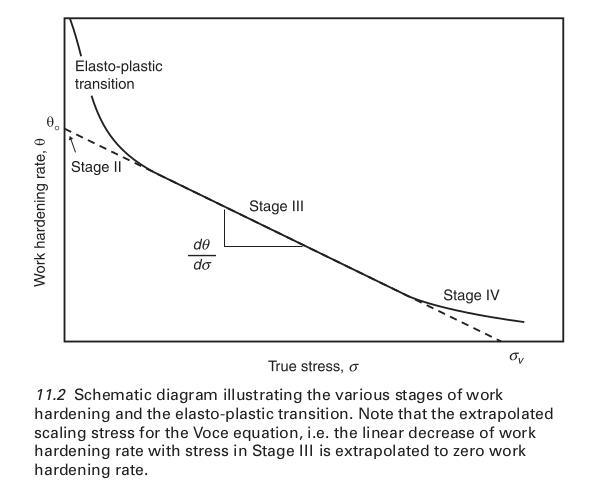

## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\frac{\sigma}{\epsilon}$

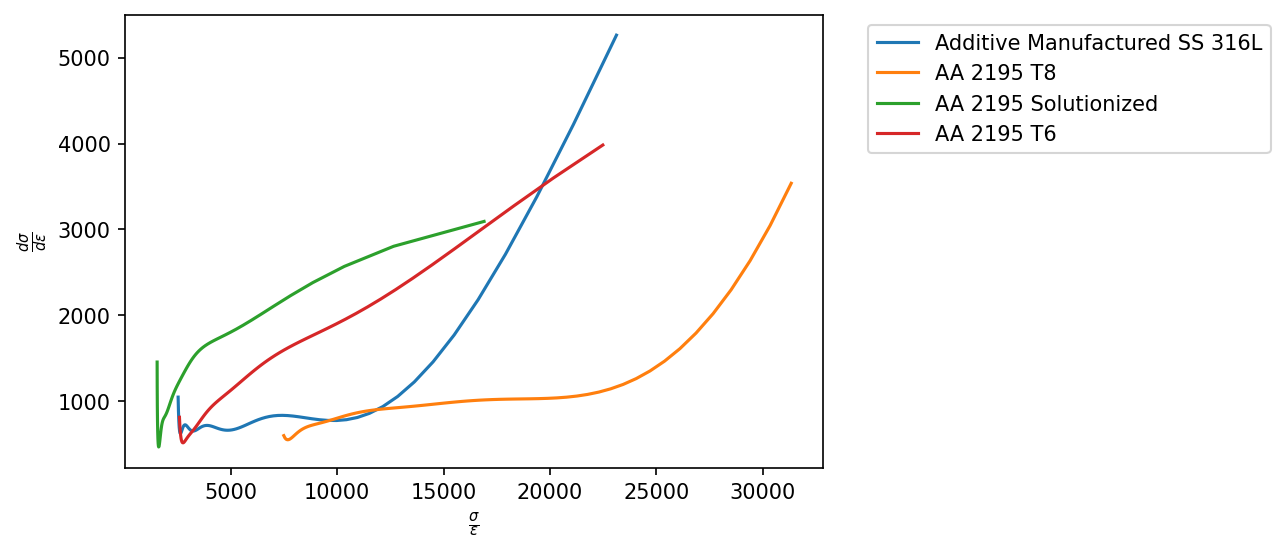

In [6]:
fig, ax = plt.subplots(1,1)

for i in range(len(reduced_true_stress)):
    sigma_epsilon = np.true_divide(reduced_true_stress[i], reduced_true_strain[i])

    ax.plot(sigma_epsilon[:consider-1], d_sigma_epsilon[i])
    ax.set_xlabel('$\\frac{\sigma}{\epsilon}$')
    ax.set_ylabel('$\\frac{d\sigma}{d\epsilon}$')

fig.set_dpi(150)
_ = ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))

## Plot of $\frac{d\sigma}{d\epsilon}$ v/s $\sigma - \sigma_{ys}$

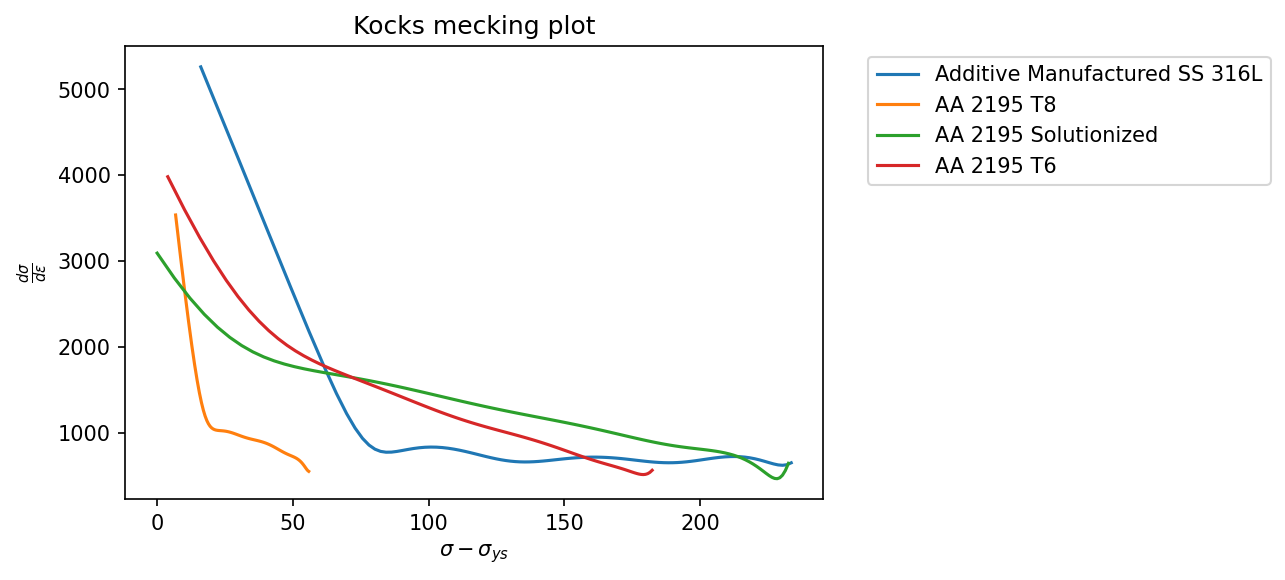

In [7]:
fig, ax = plt.subplots(1,1)

# The points are neglected because of errors in measurement
neglect_points = 4

for i in range(len(reduced_true_stress)):
    reduced_flow_stress = np.subtract(reduced_true_stress[i], float(yield_strength[i]))
    ax.plot(reduced_flow_stress[:consider-1][:len(reduced_flow_stress[:consider-1])-neglect_points], d_sigma_epsilon[i][:len(d_sigma_epsilon[i])-neglect_points])
    ax.set_xlabel('$\sigma - \sigma_{ys}$')
    ax.set_ylabel('$\\frac{d\sigma}{d\epsilon}$')

ax.set_title('Kocks mecking plot')
ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.set_dpi(150)
fig.savefig(
    f'{COMBINED_OUTPUT_DIR}/Kocks-Mecking plot',
    facecolor='white',
    bbox_inches='tight',
    transparent=False,
)

## Plot of $\sigma - \sigma_{ys}$ v/s $\epsilon$

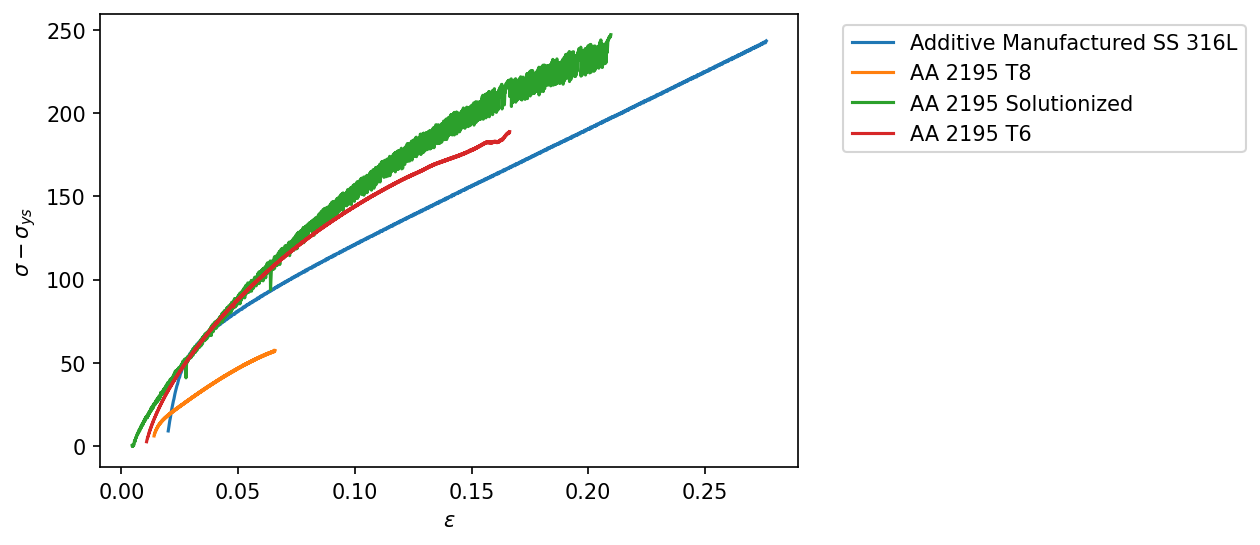

In [8]:
fig, ax = plt.subplots(1,1)

for i in range(len(true_strain)):
    ax.plot(true_strain[i], np.subtract(true_stress[i], float(yield_strength[i])))
    ax.set_ylabel('$\sigma - \sigma_{ys}$')
    ax.set_xlabel('$\epsilon$')

ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.set_dpi(150)